In [115]:
import sys 
import os
sys.path.append(os.path.abspath(".."))

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re
import itertools
import pickle
sns.set(context='paper', style='whitegrid', color_codes=True, font_scale=1.8)
colorcycle = [(0.498, 0.788, 0.498),
              (0.745, 0.682, 0.831),
              (0.992, 0.753, 0.525),
              (0.220, 0.424, 0.690),
              (0.749, 0.357, 0.090),
              (1.000, 1.000, 0.600),
              (0.941, 0.008, 0.498),
              (0.400, 0.400, 0.400)]
sns.set_palette(colorcycle)
mpl.rcParams['figure.max_open_warning'] = 65
mpl.rcParams['figure.figsize'] = [12, 7]
mpl.rcParams['text.usetex'] = True

from speclib import misc, plotting, loaders

%matplotlib inline 

In [2]:
qdf = pd.read_pickle('../../allan_data/RGender_.pkl') 
userAlias = loaders.Useralias()
qdf.index = qdf.index.map(lambda us: userAlias[us])
f = misc.QuestionFilterer(qdf)
q = misc.QuestionCompleter(qdf) 

qdf.head() 

,function_duties__answer,function_duties__answer_type,function_duties__question,function_duties__response,function_duties__condition,narcissism_opponents__answer,narcissism_opponents__answer_type,narcissism_opponents__question,narcissism_opponents__response,narcissism_opponents__condition,...,selfesteem_proud__answer_type,selfesteem_proud__question,selfesteem_proud__response,selfesteem_proud__condition,narcissism_excellent__answer,narcissism_excellent__answer_type,narcissism_excellent__question,narcissism_excellent__response,narcissism_excellent__condition,gender
u0001,0.0,radio,At varetage dine praktiske pligter i hjemmet?,Slet ikke,False,1.0,radio,"Jeg nyder for mig selv, når mine modstandere m...",2,False,...,radio,Jeg føler at jeg ikke har meget at være stolt af,Uenig,False,3.0,radio,Jeg formår at være midtpunkt for opmærksomhed ...,4,False,male
u0002,1.0,radio,At varetage dine praktiske pligter i hjemmet?,Lidt,False,2.0,radio,"Jeg nyder for mig selv, når mine modstandere m...",3,False,...,radio,Jeg føler at jeg ikke har meget at være stolt af,Uenig,False,2.0,radio,Jeg formår at være midtpunkt for opmærksomhed ...,3,False,male
u0003,1.0,radio,At varetage dine praktiske pligter i hjemmet?,Lidt,False,1.0,radio,"Jeg nyder for mig selv, når mine modstandere m...",2,False,...,radio,Jeg føler at jeg ikke har meget at være stolt af,Enig,False,1.0,radio,Jeg formår at være midtpunkt for opmærksomhed ...,2,False,male
u0004,1.0,radio,At varetage dine praktiske pligter i hjemmet?,Lidt,False,2.0,radio,"Jeg nyder for mig selv, når mine modstandere m...",3,False,...,radio,Jeg føler at jeg ikke har meget at være stolt af,Uenig,False,1.0,radio,Jeg formår at være midtpunkt for opmærksomhed ...,2,False,male
u0006,1.0,radio,At varetage dine praktiske pligter i hjemmet?,Lidt,False,1.0,radio,"Jeg nyder for mig selv, når mine modstandere m...",2,False,...,radio,Jeg føler at jeg ikke har meget at være stolt af,Stærkt uenig,False,0.0,radio,Jeg formår at være midtpunkt for opmærksomhed ...,Passer slet ikke 1,False,female


In [3]:
bi = pd.read_msgpack('../../allan_data/bluetooth_interaction_daily_df.msgpack')
bi = bi.fillna(0)
bi.head() 

,u0182,u1015,u0778,u0933,u0256,u0659,u0719,u0709,u0748,u0045,...,u0912,u0392,u0060,u0125,u0854,u0404,u0202,u0353,u0382,u0188
timestamp,,,,,,,,,,,,,,,,,,,,,
2013-12-10,27.0,1.0,24.0,222.0,0.0,0.0,104.0,0.0,0.0,66.0,...,96.0,0.0,0.0,66.0,145.0,65.0,104.0,403.0,96.0,71.0
2013-12-11,60.0,0.0,16.0,269.0,0.0,0.0,131.0,0.0,0.0,94.0,...,87.0,0.0,0.0,68.0,176.0,44.0,92.0,462.0,176.0,140.0
2013-12-12,67.0,0.0,16.0,177.0,0.0,0.0,130.0,0.0,0.0,68.0,...,83.0,0.0,0.0,40.0,176.0,30.0,76.0,458.0,183.0,156.0
2013-12-13,80.0,0.0,16.0,176.0,0.0,0.0,112.0,0.0,0.0,64.0,...,112.0,0.0,0.0,32.0,176.0,16.0,64.0,512.0,192.0,160.0
2013-12-14,80.0,0.0,16.0,176.0,0.0,0.0,112.0,0.0,0.0,64.0,...,112.0,0.0,0.0,32.0,176.0,16.0,64.0,512.0,192.0,160.0


In [4]:
fs = pd.DataFrame() 

In [5]:
fs['weekly_alcohol'] = qdf.filter(regex='alcohol_volume.+_answer$').sum(axis=1)
fs.head() 

,weekly_alcohol
u0001,35.0
u0002,0.0
u0003,14.0
u0004,4.0
u0006,0.0


In [6]:
tmp = qdf.filter(regex='alcohol_volume.+_answer$') 
tmp.columns = tmp.columns.str.extract(r'([^_]+day)', expand=False)
tmp = tmp[misc.sortWeekdays(tmp.columns)]
display(tmp.head())
weekend_days = ["friday", "saturday"]
fs['weekday_weekend_alcohol'] = tmp[weekend_days].sum(axis=1) / tmp.drop(weekend_days, axis=1).sum(axis=1)
fs['weekday_weekend_alcohol'] = fs.weekday_weekend_alcohol.replace({np.inf: 0, np.NaN: 0})
fs.head() 

,monday,tuesday,wednesday,thursday,friday,saturday,sunday
u0001,0.0,30.0,5.0,0.0,0.0,0.0,0.0
u0002,0.0,0.0,0.0,0.0,0.0,0.0,0.0
u0003,0.0,0.0,0.0,0.0,12.0,2.0,0.0
u0004,1.0,1.0,0.0,0.0,0.0,1.0,1.0
u0006,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,weekly_alcohol,weekday_weekend_alcohol
u0001,35.0,0.000000
u0002,0.0,0.000000
u0003,14.0,0.000000
u0004,4.0,0.333333
u0006,0.0,0.000000


In [7]:
misc.questionSummary(qdf, q.alcohol_everyday)

,response_index,answer_index,count
0,0 gange,0.0,759
1,1 gange,1.0,99
2,2 gange,2.0,25
3,3 gange,3.0,11
4,4-5 gange,4.0,3
5,6+ gange,5.0,6


In [8]:
tmp = qdf.alcohol_everyday__answer
tmp = tmp.replace({4: 4.5, 5: 6})

fs['before_workday_alcohol'] = tmp 

In [9]:
misc.questionSummary(qdf, q.alcohol_drunk)

,response_index,answer_index,count
0,0 gange,0.0,135
1,1 gange,1.0,124
2,2 gange,2.0,153
3,3 gange,3.0,120
4,4-5 gange,4.0,187
5,6-9 gange,5.0,136
6,10+ gange,6.0,48


Replace codes with numbers which reflect numerical estimates

In [10]:
fs['times_drunk_last_30_days_alcohol'] = qdf.alcohol_drunk__answer.replace({4: 4.5, 5: 7.5, 6: 10})

In [11]:
misc.questionSummary(qdf, 'alcohol_binge5')

,response_index,answer_index,count
0,0 gange,0.0,182
1,1 gange,1.0,189
2,2 gange,2.0,164
3,3 gange,3.0,153
4,4-5 gange,4.0,120
5,6+ gange,5.0,95


In [12]:
fs['binge_5_alcohol'] = qdf.alcohol_binge5__answer
fs['binge_10_alcohol'] = qdf.alcohol_binge10__answer

In [13]:
fs['times_very_drunk_alcohol'] = qdf.alcohol_very_drunk__answer.replace({4:4.5, 5:6})

In [16]:
misc.questionSummary(qdf, q.alcohol_very_drunk)

,response_index,answer_index,count
0,0 gange,0.0,307
1,1 gange,1.0,216
2,2 gange,2.0,155
3,3 gange,3.0,97
4,4-5 gange,4.0,92
5,6+ gange,5.0,36


In [14]:
misc.questionSummary(qdf, q.alcohol_weekend)

,response_index,answer_index,count
0,0 gange,0.0,113
1,1 gange,1.0,158
2,2 gange,2.0,199
3,3 gange,3.0,173
4,4-5 gange,4.0,184
5,6+ gange,5.0,76


In [17]:
fs['alcohol_weekend_alcohol'] = qdf.alcohol_weekend__answer.replace({4: 4.5, 5: 6}) 

In [18]:
fs['gender'] = qdf.gender.replace({'male': 0, 'female': 1})

In [19]:
fs.head(12)

,weekly_alcohol,weekday_weekend_alcohol,before_workday_alcohol,times_drunk_last_30_days_alcohol,binge_5_alcohol,binge_10_alcohol,times_very_drunk_alcohol,alcohol_weekend_alcohol,gender
u0001,35.0,0.000000,0.0,3.0,2.0,1.0,1.0,3.0,0
u0002,0.0,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,0
u0003,14.0,0.000000,0.0,2.0,2.0,2.0,2.0,3.0,0
u0004,4.0,0.333333,0.0,1.0,1.0,1.0,1.0,1.0,0
u0006,0.0,0.000000,0.0,1.0,1.0,0.0,0.0,1.0,1
u0007,13.0,0.000000,0.0,3.0,3.0,2.0,2.0,3.0,0
u0008,37.0,0.156250,0.0,7.5,4.0,2.0,2.0,3.0,1
u0009,2.0,1.000000,0.0,2.0,1.0,1.0,1.0,1.0,0
u0010,0.0,0.000000,0.0,4.5,4.0,3.0,2.0,1.0,0
u0011,32.0,15.000000,0.0,7.5,5.0,5.0,6.0,6.0,0


In [20]:
misc.questionSummary(qdf, q.smoke_daily)

,response_index,answer_index,count
0,12 år,3.0,2
1,13 år,4.0,3
2,14 år,5.0,5
3,15 år,6.0,9
4,16 eller mere,7.0,44


In [21]:
misc.questionSummary(qdf, q.smoke_first_cigarette)

,response_index,answer_index,count
0,9 år eller yngre,0.0,6
1,11 år,1.0,4
2,10 år,2.0,4
3,12 år,3.0,14
4,13 år,4.0,27
5,14 år,5.0,65
6,15 år,6.0,60
7,16 eller mere,7.0,104


In [22]:
fs['frequent_smoke'] = qdf.smoke_freq__answer.replace({0:3, 1:2, 2:1, 3:0})

In [27]:
misc.questionSummary(qdf, q.smoke_freq)

,response_index,answer_index,count
0,"Ja, dagligt",0.0,63
1,"Ja, men ikke dagligt",1.0,98
2,"Nej, men jeg har røget tidligere",2.0,121
3,"Nej, jeg har aldrig røget",3.0,654


Collapse `volume_smoke` into bins 0, 1, 2 and 3.

In [99]:
misc.questionSummary(qdf, q.smoke_volume_cigarette)

,response_index,answer_index,count
0,0.0,0.0,1
1,2.0,2.0,2
2,3.0,3.0,3
3,5.0,5.0,11
4,6.0,6.0,3
5,7.0,7.0,2
6,8.0,8.0,4
7,9.0,9.0,1
8,10.0,10.0,13
9,12.0,12.0,1


In [101]:
volume_smoke = qdf.filter(regex=r'smoke_volume_\w+__answer$').fillna(0).sum(axis=1)

In [104]:
pd.value_counts((np.ceil((np.arange(0, 21)-0.5) / 5)).astype(np.int)) 

4    5
3    5
2    5
1    5
0    1
dtype: int64

In [105]:
fs['volume_smoke'] = volume_smoke.replace({x: (np.ceil(x - 0.5)/5).astype(int) for x in range(21)}) 

In [96]:
fs.head(12) 

,weekly_alcohol,weekday_weekend_alcohol,before_workday_alcohol,times_drunk_last_30_days_alcohol,binge_5_alcohol,binge_10_alcohol,times_very_drunk_alcohol,alcohol_weekend_alcohol,gender,frequent_smoke,volume_smoke
u0001,35.0,0.000000,0.0,3.0,2.0,1.0,1.0,3.0,0,1.0,0.0
u0002,0.0,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,0,3.0,4.0
u0003,14.0,0.000000,0.0,2.0,2.0,2.0,2.0,3.0,0,0.0,0.0
u0004,4.0,0.333333,0.0,1.0,1.0,1.0,1.0,1.0,0,0.0,0.0
u0006,0.0,0.000000,0.0,1.0,1.0,0.0,0.0,1.0,1,0.0,0.0
u0007,13.0,0.000000,0.0,3.0,3.0,2.0,2.0,3.0,0,0.0,0.0
u0008,37.0,0.156250,0.0,7.5,4.0,2.0,2.0,3.0,1,2.0,0.0
u0009,2.0,1.000000,0.0,2.0,1.0,1.0,1.0,1.0,0,2.0,0.0
u0010,0.0,0.000000,0.0,4.5,4.0,3.0,2.0,1.0,0,0.0,0.0
u0011,32.0,15.000000,0.0,7.5,5.0,5.0,6.0,6.0,0,2.0,0.0


In [23]:
misc.questionSummary(qdf, q.homophily_competent) 

,response_index,answer_index,count
0,meget vigtig for mig,0.0,66
1,vigtig for mig,1.0,487
2,ikke så vigtig for mig,2.0,298
3,er ligegyldig,3.0,48
4,ved ikke,4.0,9


In [107]:
qdf.smoke_volume_cigarette__condition.unique() 

array(["smoke_freq=='Ja, dagligt'"], dtype=object)

Combine "ved ikke" and "er ligegyldigt".

In [108]:
misc.questionSummary(qdf, q.homophily_competent )

,response_index,answer_index,count
0,meget vigtig for mig,0.0,70
1,vigtig for mig,1.0,503
2,ikke så vigtig for mig,2.0,306
3,er ligegyldig,3.0,48
4,ved ikke,4.0,9


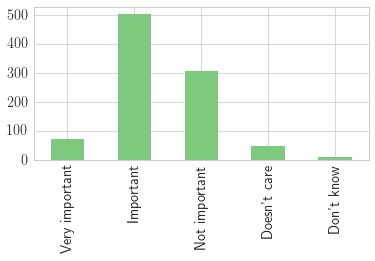

In [150]:
fig, ax = plt.subplots()
misc.questionResponse(qdf, q.homophily_competent).plot.bar(ax=ax, color=colorcycle[0]) 
ax.set_xticklabels(["Very important", "Important", "Not important", "Doesn't care", "Don't know"])
fig.subplots_adjust(bottom=0.35) 
ax.set_yticks(np.arange(0, 501, 100))
fig.savefig('figs/academic_ambition_importance.pdf') 

In [123]:
tmp = qdf.homophily_competent__answer 
tmp = tmp.replace(4, 3)
fs['academic_skills_importance_homophily'] = tmp
fs.head() 

,weekly_alcohol,weekday_weekend_alcohol,before_workday_alcohol,times_drunk_last_30_days_alcohol,binge_5_alcohol,binge_10_alcohol,times_very_drunk_alcohol,alcohol_weekend_alcohol,gender,frequent_smoke,volume_smoke,academic_skills_importance_homophily
u0001,35.0,0.000000,0.0,3.0,2.0,1.0,1.0,3.0,0,1.0,0.0,1.0
u0002,0.0,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,0,3.0,4.0,1.0
u0003,14.0,0.000000,0.0,2.0,2.0,2.0,2.0,3.0,0,0.0,0.0,2.0
u0004,4.0,0.333333,0.0,1.0,1.0,1.0,1.0,1.0,0,0.0,0.0,0.0
u0006,0.0,0.000000,0.0,1.0,1.0,0.0,0.0,1.0,1,0.0,0.0,1.0


In [124]:
misc.questionSummary(qdf, q.homophily_socialize)

,response_index,answer_index,count
0,meget vigtig for mig,0.0,445
1,vigtig for mig,1.0,423
2,ikke så vigtig for mig,2.0,57
3,er ligegyldig,3.0,7
4,ved ikke,4.0,4


In [125]:
tmp = qdf.homophily_socialize__answer 
tmp = tmp.replace({4: 0, 3: 0, 2: 1, 1: 2, 0: 3})
fs['social_study_friends_homophily'] = tmp
fs.head() 

,weekly_alcohol,weekday_weekend_alcohol,before_workday_alcohol,times_drunk_last_30_days_alcohol,binge_5_alcohol,binge_10_alcohol,times_very_drunk_alcohol,alcohol_weekend_alcohol,gender,frequent_smoke,volume_smoke,academic_skills_importance_homophily,social_study_friends_homophily
u0001,35.0,0.000000,0.0,3.0,2.0,1.0,1.0,3.0,0,1.0,0.0,1.0,3.0
u0002,0.0,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,0,3.0,4.0,1.0,2.0
u0003,14.0,0.000000,0.0,2.0,2.0,2.0,2.0,3.0,0,0.0,0.0,2.0,2.0
u0004,4.0,0.333333,0.0,1.0,1.0,1.0,1.0,1.0,0,0.0,0.0,0.0,2.0
u0006,0.0,0.000000,0.0,1.0,1.0,0.0,0.0,1.0,1,0.0,0.0,1.0,2.0


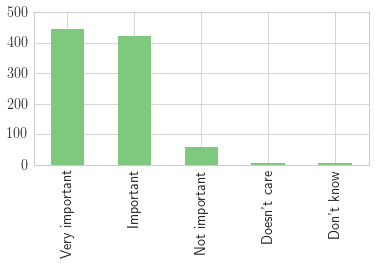

In [151]:
fig, ax = plt.subplots()
misc.questionResponse(qdf, q.homophily_socialize).plot.bar(ax=ax, color=colorcycle[0]) 
ax.set_xticklabels(["Very important", "Important", "Not important", "Doesn't care", "Don't know"])
fig.subplots_adjust(bottom=0.35) 
ax.set_yticks(np.arange(0, 501, 100))
fig.savefig('figs/socialization_importance.pdf')

In [146]:
print("Academic ambition are more important than the social aspects for {:0.1f} % of students.".format((fs.social_study_friends_homophily < fs.academic_skills_importance_homophily).mean() * 100))

print("{:0.1f} % of students rates it as equally important.".format((fs.social_study_friends_homophily == fs.academic_skills_importance_homophily).mean() * 100))

Academic ambition are more important than the social aspects for 6.3 % of students.
21.7 % of students rates it as equally important.


In [128]:
fs['live_alone'] = qdf.live_alone__answer

In [129]:
fs['bt_registered_mean'] = bi.mean()

In [35]:
fs.isnull().sum() 

weekly_alcohol                          0
weekday_weekend_alcohol                 0
before_workday_alcohol                  0
times_drunk_last_30_days_alcohol        0
binge_5_alcohol                         0
binge_10_alcohol                        0
times_very_drunk_alcohol                0
alcohol_weekend_alcohol                 0
gender                                  0
frequent_smoke                          0
volume_smoke                            0
academic_skills_importance_homophily    0
social_study_friends_homophily          0
live_alone                              0
bt_registered_mean                      0
dtype: int64

In [36]:
fs.shape[0]

808

In [37]:
fs = fs.dropna() 

In [39]:
fs = fs.sort_values('bt_registered_mean')

In [40]:
fs.to_msgpack('../../allan_data/morequestions_feature_space.msgpack')

In [41]:
bi.to_msgpack('../../allan_data/bluetooth_daily.msgpack')